In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader, TensorDataset

In [2]:
def piecewise_linear_function(x):
    return 2 * (torch.relu(x - 1) - torch.relu(x - 2))

In [3]:
# Générer des données d'entraînement
x_train = torch.linspace(-5, 5, 10000).unsqueeze(1)  # 1000 points entre 0 et 12
y_train = piecewise_linear_function(x_train)

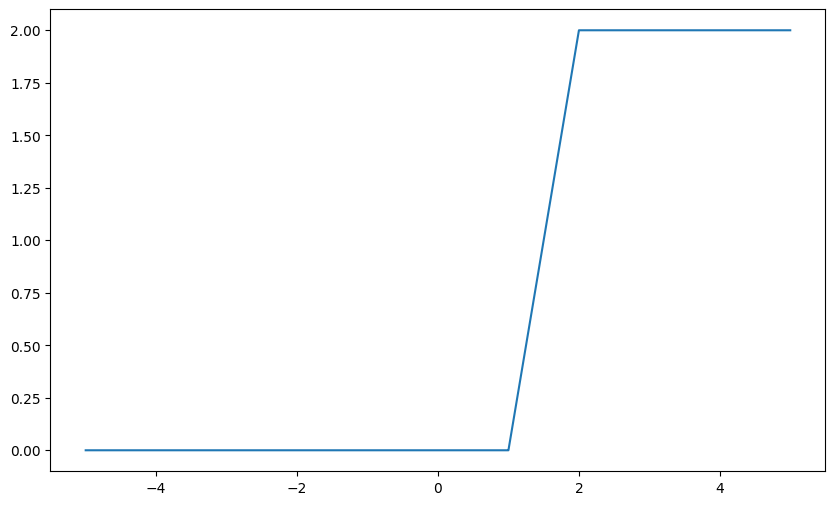

In [4]:
plt.figure(figsize=(10, 6))
plt.plot(x_train, y_train, label="piecewise_linear_function(x)")
plt.show()

In [5]:
class SimpleMLP(nn.Module):
    def __init__(self):
        super(SimpleMLP, self).__init__()
        self.fc1 = nn.Linear(1, 2)
        self.fc2 = nn.Linear(2, 1)

    def forward(self, x):
        x = self.fc1(x)
        x = torch.relu(x)  # ReLU activations
        x = self.fc2(x)
        return x

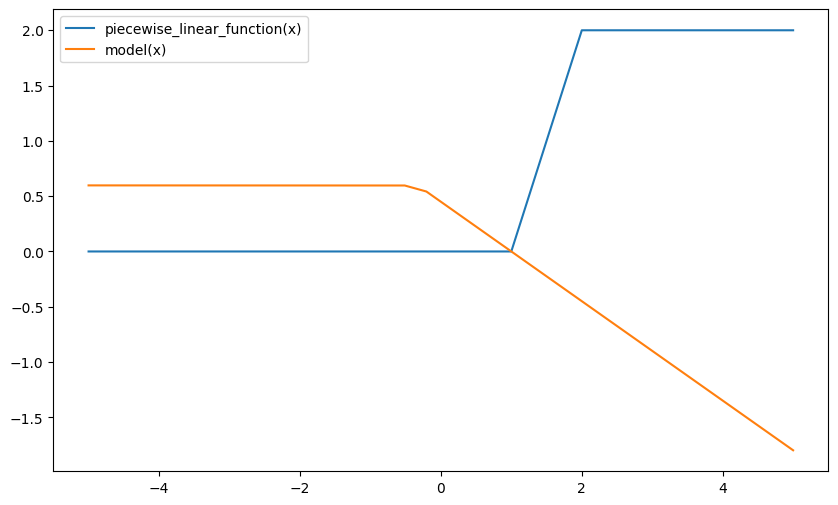

In [6]:
model = SimpleMLP()

with torch.no_grad():
    y_pred = model(x_train)
    plt.figure(figsize=(10, 6))
    plt.plot(x_train, y_train, label="piecewise_linear_function(x)")
    plt.plot(x_train, y_pred, label="model(x)")
    plt.legend()
    plt.show()

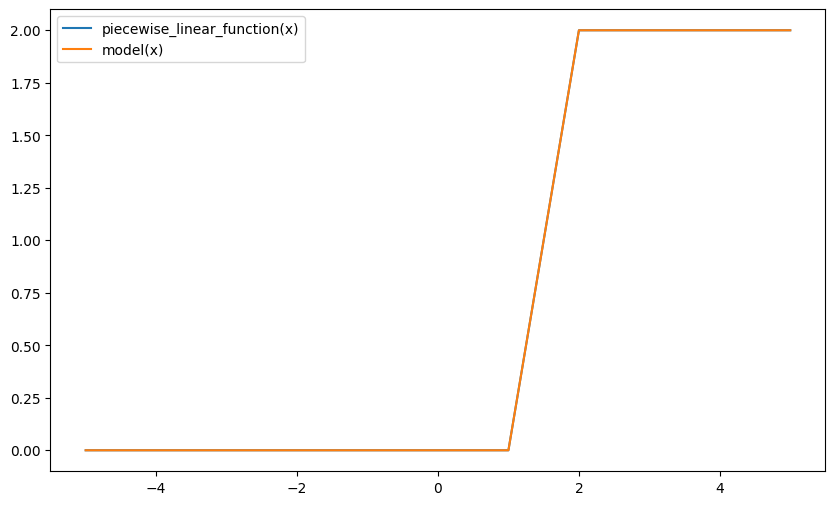

In [7]:
model = SimpleMLP()

with torch.no_grad():
    model.fc1.weight.data = torch.tensor([[1.0], [1.0]])
    model.fc1.bias.data = torch.tensor([-1.0, -2.0])

    model.fc2.weight.data = torch.tensor([[2.0, -2.0]])
    model.fc2.bias.data = torch.tensor([0.0])

    y_pred = model(x_train)
    plt.figure(figsize=(10, 6))
    plt.plot(x_train, y_train, label="piecewise_linear_function(x)")
    plt.plot(x_train, y_pred, label="model(x)")
    plt.legend()
    plt.show()

In [8]:
train_dataset = TensorDataset(x_train, y_train)
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

In [9]:
model = SimpleMLP()
criterion = nn.MSELoss()

In [17]:
optimizer = optim.Adam(model.parameters(), lr=0.01, weight_decay=1e-5)

# Training the model
epochs = 100
losses = []

for epoch in range(epochs):
    model.train()
    epoch_loss = 0

    for batch_x, batch_y in train_loader:
        y_pred = model(batch_x)
        loss = criterion(y_pred, batch_y)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()

    average_loss = epoch_loss / len(train_loader)
    losses.append(average_loss)

    if (epoch + 1) % 10 == 0:
        print(f"Epoch {epoch + 1}/{epochs}, Loss: {average_loss}")
# Eval the model
model.eval()
x_test = torch.linspace(-3, 15, 10000).unsqueeze(1)
y_test = piecewise_linear_function(x_test).detach().numpy()
y_pred = model(x_test).detach().numpy()

Epoch 10/100, Loss: 2.0309091106663075e-05
Epoch 20/100, Loss: 0.00027724634242653324
Epoch 30/100, Loss: 0.00019333471399585084
Epoch 40/100, Loss: 5.6280131082753596e-05
Epoch 50/100, Loss: 0.00017950728939070677
Epoch 60/100, Loss: 2.397427999340182e-06
Epoch 70/100, Loss: 1.5500300542907593e-06
Epoch 80/100, Loss: 1.0177001660634281e-07
Epoch 90/100, Loss: 1.3677013678973103e-07
Epoch 100/100, Loss: 0.00029420165561097443


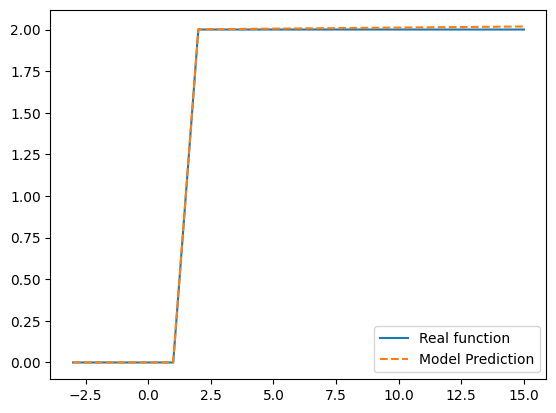

In [18]:
# Plot the model predictions
plt.plot(x_test, y_test, label="Real function")
plt.plot(x_test, y_pred, label="Model Prediction", linestyle="--")
plt.legend()
plt.show()

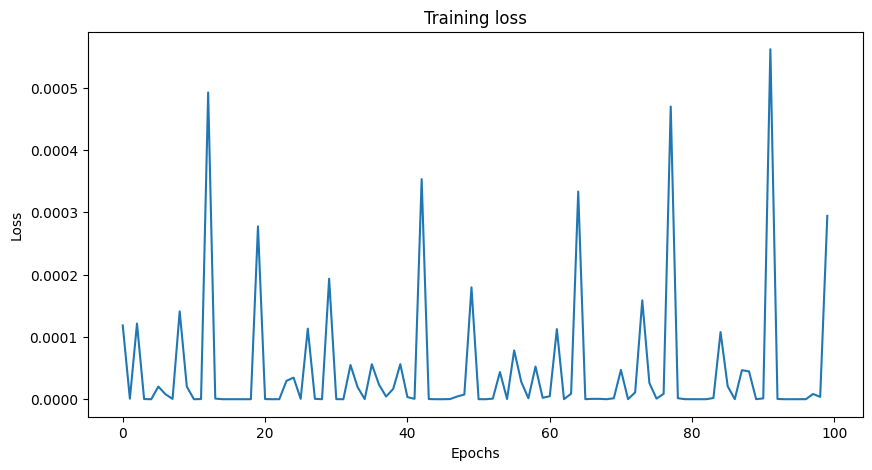

In [19]:
plt.figure(figsize=(10, 5))
plt.plot(range(epochs), losses)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training loss")
plt.show()

In [20]:
# Print the weights and biases of the model
print("Weights of the first layer (fc1):", model.fc1.weight.data)

print("\nBiases of the first layer (fc1):", model.fc1.bias.data)

print("\nWeights of the second layer (fc2):", model.fc2.weight.data)

print("\nBiases of the second layer (fc2):", model.fc2.bias.data)

Weights of the first layer (fc1): tensor([[1.5633],
        [1.7030]])

Biases of the first layer (fc1): tensor([-1.5601, -3.4089])

Weights of the second layer (fc2): tensor([[ 1.2752, -1.1698]])

Biases of the second layer (fc2): tensor([0.0003])
